In [1]:
import numpy as np
import math
from matplotlib import pyplot as plt

In [2]:
N = 50
x_start, x_end = -2.0, 2.0
y_start, y_end = -1.0, 1.0
x = np.linspace(x_start, x_end, N)
y = np.linspace(y_start, y_end, N)

X, Y = np.meshgrid(x, y)

In [74]:
x_vortex = 0.0
y_vortex = 0.0
gamma = 5.0

In [75]:
def get_velocity_streamlines_vortex(strength, xv, yv, X, Y):
    u = strength / (2 * math.pi) * (Y - yv) / ((X - xv)**2 + (Y - yv)**2)
    v = -strength / (2 * math.pi) * (X - xv) / ((X - xv)**2 + (Y - yv)**2)
    psi = strength / (4 * math.pi) * np.log((X - xv)**2 + (Y - yv)**2)
    return u, v, psi

In [76]:
u_vortex, v_vortex, psi_vortex = get_velocity_streamlines_vortex(gamma, x_vortex, y_vortex, X, Y)

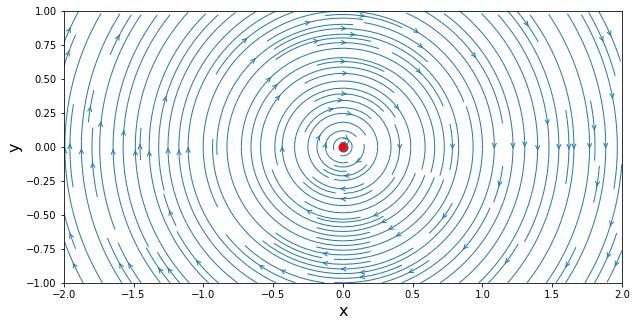

In [77]:
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
plt.figure(figsize=(width, height))
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)
plt.streamplot(X, Y, u_vortex, v_vortex, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
plt.scatter(x_vortex, y_vortex, color='red', s=80, marker='o');

In [78]:
strength_sink = -1.0
x_sink, y_sink = 0.0, 0.0

def get_velocity_sink(strength, xs, ys, X, Y):
    u = strength/(2*np.pi)*(X - xs)/((X - xs)**2 + (Y - ys)**2)
    v = strength/(2*np.pi)*(Y - ys)/((X - xs)**2 + (Y - ys)**2)
    psi = strength/(2*np.pi)*np.arctan2((Y - ys), (X - xs))
    return u, v, psi

In [79]:
u_sink, v_sink, psi_sink = get_velocity_sink(strength_sink, x_sink, y_sink, X, Y)

In [80]:
u = u_vortex + u_sink
v = v_vortex + v_sink
psi = psi_vortex + psi_sink

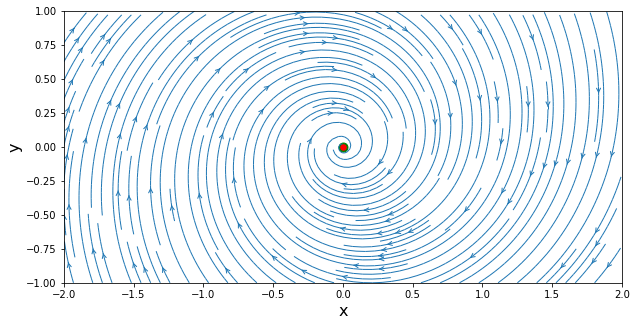

In [81]:
plt.figure(figsize=(width, height))
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)
plt.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
plt.scatter(x_vortex, y_vortex, color='g', s=80, marker='o')
plt.scatter(x_sink, y_sink, color='red', s=30, marker='o');